Number of time points calculated: 2001
Final population (t=200): x(200) = 5.76, y(200) = 38.20


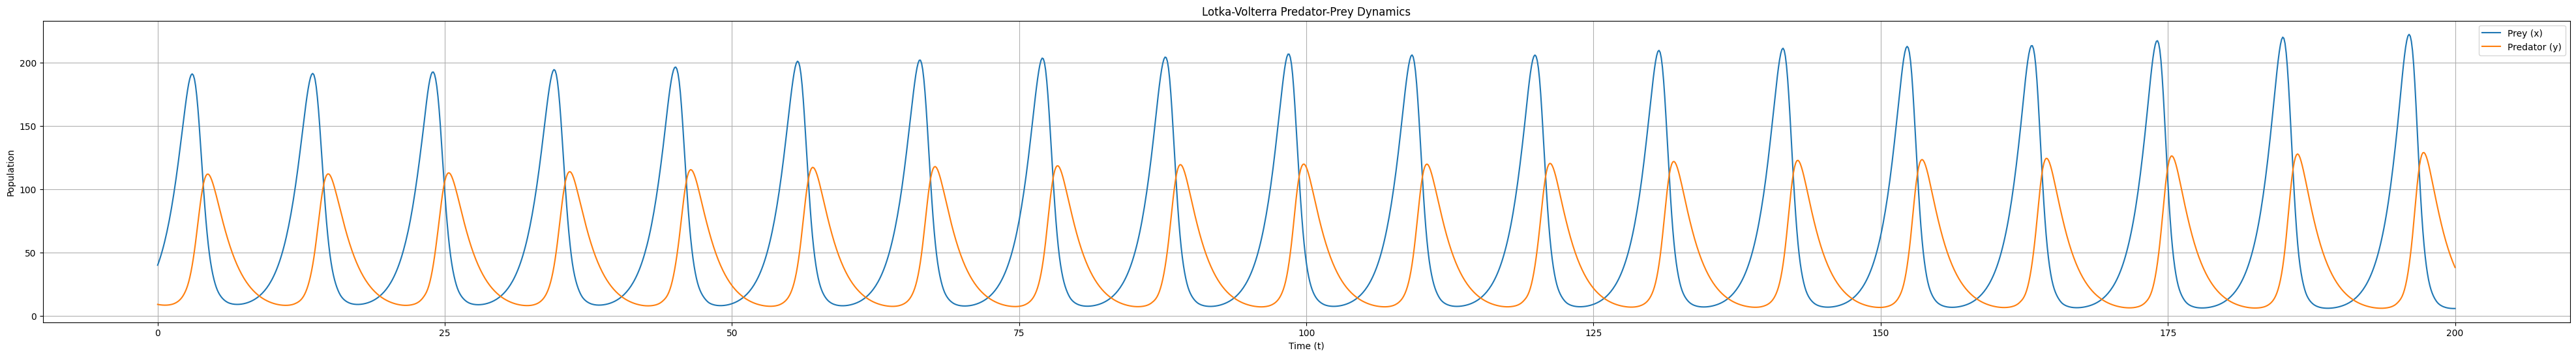

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 1. Define the System Parameters ---
a = 0.8
b = 0.02
c = 0.6
d = 0.01

# --- 2. Define the Lotka-Volterra ODE System ---
def lotka_volterra(t, z):
    x, y = z
    
    dxdt = a * x - b * x * y
    
    dydt = -c * y + d * x * y
    
    return [dxdt, dydt]

# --- 3. Define Initial Conditions and Time Span ---
x0 = 40
y0 = 9 
z0 = [x0, y0]

t_start = 0
t_end = 200
t_span = (t_start, t_end)

# Time points where we want the solution (e.g., 2001 points)
t_points = np.linspace(t_start, t_end, 2001)

# --- 4. Solve the System Numerically ---
solution = solve_ivp(
    fun=lotka_volterra,
    t_span=t_span,
    y0=z0,
    t_eval=t_points,
    method='RK45'
)

# --- 5. Extract and Plot Results ---
t = solution.t
x = solution.y[0]  
y = solution.y[1]  

print(f"Number of time points calculated: {len(t)}")
# Display the final values
print(f"Final population (t={t_end}): x({t_end}) = {x[-1]:.2f}, y({t_end}) = {y[-1]:.2f}")

# Plotting the results
plt.figure(figsize=(50, 6))
plt.plot(t, x, label='Prey (x)')
plt.plot(t, y, label='Predator (y)')
plt.title('Lotka-Volterra Predator-Prey Dynamics')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()


lotka_volterra_phase_portrait.png


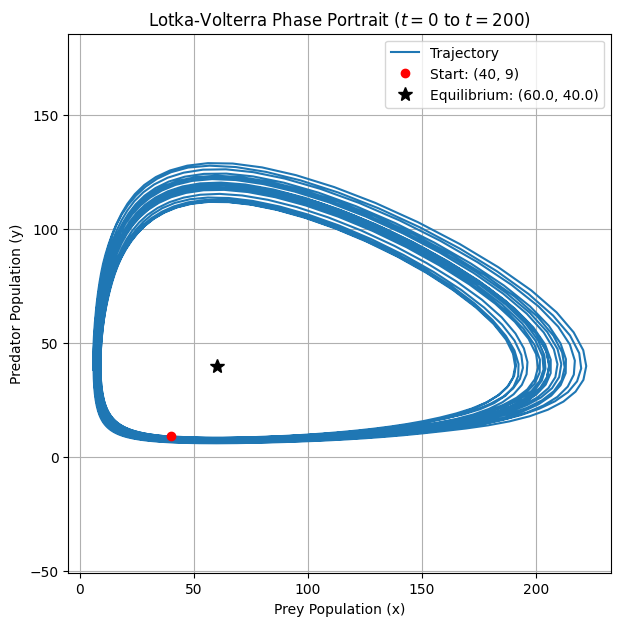

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 1. Define the System Parameters ---
a = 0.8
b = 0.02
c = 0.6
d = 0.01

# --- 2. Define the Lotka-Volterra ODE System ---
def lotka_volterra(t, z):
    """
    Defines the system of ordinary differential equations (ODEs).
    z[0] = x (prey population)
    z[1] = y (predator population)
    """
    x, y = z
    
    # dx/dt = ax - bxy
    dxdt = a * x - b * x * y
    
    # dy/dt = -cy + dxy
    dydt = -c * y + d * x * y
    
    return [dxdt, dydt]

# --- 3. Define Initial Conditions and Time Span ---
x0 = 40  # Initial prey population
y0 = 9   # Initial predator population
z0 = [x0, y0]

t_start = 0
t_end = 200
t_span = (t_start, t_end)
t_points = np.linspace(t_start, t_end, 2001)

# --- 4. Solve the System Numerically ---
solution = solve_ivp(
    fun=lotka_volterra,
    t_span=t_span,
    y0=z0,
    t_eval=t_points,
    method='RK45'
)

# --- 5. Extract and Plot Results (Phase Portrait) ---
x = solution.y[0]  
y = solution.y[1]  

# Calculate the non-trivial equilibrium point for reference
x_eq = c / d
y_eq = a / b

# Plotting the Phase Portrait
plt.figure(figsize=(7, 7))
plt.plot(x, y, label='Trajectory')

# Mark the initial point
plt.plot(x[0], y[0], 'ro', label=f'Start: ({x0}, {y0})')

# Mark the stable equilibrium point (center of the cycle)
plt.plot(x_eq, y_eq, 'k*', markersize=10, label=f'Equilibrium: ({x_eq:.1f}, {y_eq:.1f})')

plt.title('Lotka-Volterra Phase Portrait ($t=0$ to $t=200$)')
plt.xlabel('Prey Population (x)')
plt.ylabel('Predator Population (y)')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.savefig('lotka_volterra_phase_portrait.png')
print("lotka_volterra_phase_portrait.png")